#**Inferential**  **statistics**

Inferential statistics helps us make generalizations about a population based on a sample.
In data science, statistical inference plays a crucial role in analyzing and interpreting data. It involves making use of probability distributions, sampling methods, estimation techniques, hypothesis testing, and confidence intervals to draw meaningful insights from data. By applying these techniques, we can make inferences about the underlying population, assess the significance of relationships or differences, and quantify the uncertainty in our conclusions.
In this notebook, we will analyze the Titanic dataset to understand survival patterns and relationships between passenger characteristics.

**Import** **Necessary** **Libraries**

We import essential Python libraries:

seaborn for built-in datasets and visualization.

pandas for data manipulation.

numpy for numerical computations.

scipy.stats for statistical tests.

matplotlib.pyplot for plotting.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

**Load the Dataset**

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:

# Display the first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



The Titanic dataset is loaded using sns.load_dataset('titanic').

The head() function shows the first few rows of the dataset.

# **summary of numerical columns, including mean, standard deviation, and percentiles.**

In [ ]:
# Summary statistics of the numerical columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The age column shows the average passenger age and its distribution.

The fare column shows the range of ticket prices.

Survival Rate: Only 38% survived.
Passenger Class: Most were 3rd-class passengers, meaning economic status played a role in survival.

Age Distribution: Most passengers were young adults, but ages ranged widely.

Family Members: Many passengers traveled alone, which may have influenced their survival chances.

Fare Prices: Most passengers paid low fares, but some first-class passengers paid significantly higher prices.

# Basic Probability

Probability can roughly be described as the chance of an event or sequence of events occurring.
Experiment – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
Outcome is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
Event is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.

In [ ]:
prob_survival = titanic['survived'].mean()
prob_survival

0.3838383838383838

This gives the probability that a randomly selected passenger survived.
it means 38% of passengers survived.

# Survival Rate by Gender (T-Test)

In [ ]:
male_survival = titanic[titanic['sex'] == 'male']['survived']
female_survival = titanic[titanic['sex'] == 'female']['survived']

# Perform T-test
t_stat, p_value = stats.ttest_ind(male_survival.dropna(), female_survival.dropna())

# Print results
t_stat, p_value



(-19.297816550123354, 1.4060661308802594e-69)

T-statistic (t_stat = (-19.297816550123354)
A negative T-statistic means that male survival rates are lower than female survival rates.
The large absolute value (19.30) suggests a strong difference between the two groups.
Conclusion: Men had significantly lower survival rates compared to women.

P-value (p_value = 1.41e-69)
This is a tiny p-value (1.4060661308802594e-69).
A p-value < 0.05 means the difference is statistically significant.
Since the p-value is extremely close to 0, we strongly reject the null hypothesis (which assumes no difference in survival rates).
Conclusion: The survival difference between males and females was not due to random chance—women had significantly higher survival rates.

# Chi-Square Test: Survival vs Passenger Class

In [ ]:
# Chi-square test to check relationship between survival and passenger class
contingency_table = pd.crosstab(titanic['pclass'], titanic['survived'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
chi2_stat, p_value

(102.88898875696056, 4.549251711298793e-23)

A high Chi-square value (102.89) means there is a strong association between passenger class and survival.
The larger the Chi-square value, the greater the difference between the observed survival counts and what we would expect if class had no impact.
Conclusion: Passenger class had a strong effect on survival chances.

 p_value = (4.549251711298793e-23)
This is an extremely small p-value
Since p < 0.05, we reject the null hypothesis, meaning that passenger class and survival were not independent.
The probability of this result happening by chance is practically zero.
Conclusion: Passenger class significantly influenced survival rates—it was not random.

# Survival by Passenger Class

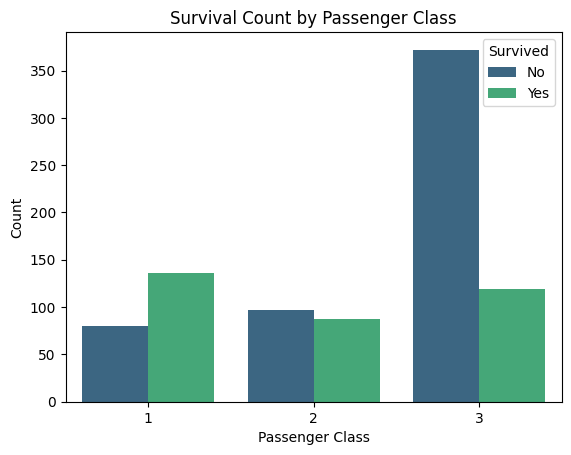

In [ ]:
# Survival count by passenger class
sns.countplot(data=titanic, x='pclass', hue='survived', palette='viridis')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

Grey: Indicates passengers who did not survive.
Green: Indicates passengers who did survive.
What the chart tells us:

Passenger Distribution: The tallest bars show us that the 3rd class had the most passengers overall.  The fewest passengers were in 1st class.

Survival Rates:  By comparing the height of the green (survived) portion of each bar, we can see the survival rates across classes:

1st Class: Had the highest proportion of survivors
2nd Class: Had a moderate survival rate.
3rd Class: Had the lowest survival rate. Most passengers in this class did not survive (the dark blue section dominates the bar).

# Age Distribution of Survivors vs Non-Survivors

<ipython-input-10-04defcab076f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='survived', y='age', palette='coolwarm')


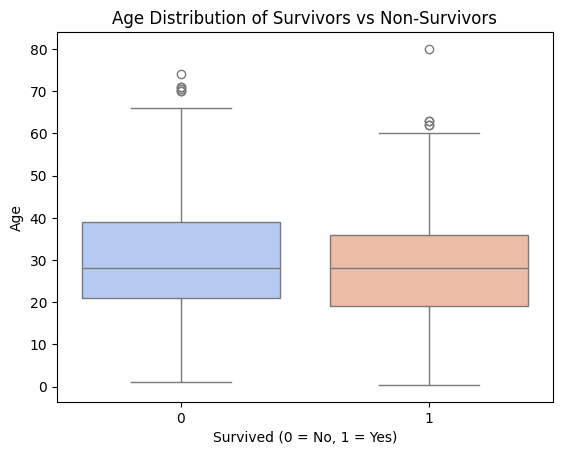

In [ ]:
# Boxplot of age distribution by survival status
sns.boxplot(data=titanic, x='survived', y='age', palette='coolwarm')
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

0 = (Did Not Survive):

The median age is slightly lower compared to survivors.

1  = (Survived):

The median age is slightly higher compared to those who didn't survive.

This box plot compares the age distribution of Titanic survivors and non-survivors.  Non-survivors tended to be slightly younger with a more concentrated age range, while survivors had a wider age range and a slightly higher median age.  The presence of outliers, especially younger ones among survivors, likely reflects the "women and children first" policy.

# Hypothesis Testing

Null Hypothesis (H₀): The mean fare of third-class passengers is equal to the overall mean fare.

Alternative Hypothesis (H₁): The mean fare of third-class passengers is significantly different from the overall mean fare.

In [ ]:
# Create a contingency table for passenger class and survival
contingency_table = pd.crosstab(titanic['pclass'], titanic['survived'])

# Perform a chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square Statistic: 102.88898875696056
P-value: 4.549251711298793e-23


The Chi-square statistic is 102.89. This value tells us how much the observed values (i.e., actual data) deviate from the expected values (if there were no relationship between passenger class and survival).

Since the P-value is significantly less than typical significance levels (such as 0.05 or 0.01), we would reject the null hypothesis. This indicates that there is a statistically significant relationship between passenger class and survival, and thus survival rates are likely not independent of passenger class.

# Type 1 and Type 2 Errors

Type I Error (False Positive): This error occurs when we incorrectly reject a true null hypothesis.

Type II Error (False Negative): This error occurs when we fail to reject a false null hypothesis

Conclusion
Statistical inference is a powerful toolkit that enables data scientists to draw conclusions, make predictions, and quantify uncertainty based on sample data. Through estimation, hypothesis testing, confidence intervals, and correlation analysis, statistical inference provides the means to understand populations, relationships, and patterns within the data.